# Week3 - Homework

Write a rule based predictor for a given matrix

* Don't use a machine learning model (You can use PCA)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/iris.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [2]:
df.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

Perfomed PCA on the dataset

In [3]:
train = df.drop('species', axis=1)

pca = PCA(n_components=2)

df_pca = pca.fit_transform(train)

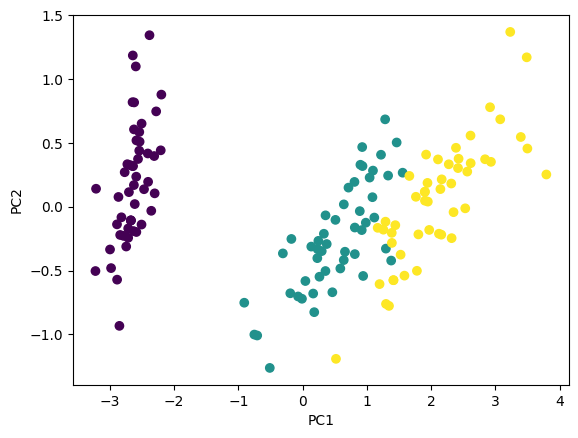

In [4]:
# Plot the iris dataset using the first two principal components
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['species'].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [0,1,2]))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [5]:
def predict_one(sepal_length, sepal_width, petal_length, petal_width):
    # your code
    
    new_sample = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    
    new_sample_pca = pca.transform(new_sample)
    
    pc1, pc2 = new_sample_pca[0]
    
    if pc1 < -1.5:
        return "Iris-setosa"
    elif pc1 < 1 and pc2 < 0:
        return "Iris-versicolor"
    else:
        return "Iris-virginica"
    
    return 'Iris-virginica'


In [6]:
predictions = pd.Series([ predict_one(*line) for line in df.iloc[:, :4].to_numpy()])
accuracy = sum(df.species == predictions) / len(df)
print(f"Accuracy: {accuracy}")

Accuracy: 0.88
